#**Vidhi Kapoor - J021**
#**Kartikay Laddha - J025**

Installling the required packages

In [1]:
!pip install dask
!pip install graphviz

Importing the multiprocessing module 

In [2]:
import multiprocessing 
import os
def print_cube(num): 
    """ 
    function to print cube of given num 
    """
    print(os.getpid())
    print("Cube: {}".format(num * num * num)) 

def print_square(num): 
    """ 
    function to print square of given num 
    """
    print(os.getpid())
    print("Square: {}".format(num * num)) 

if __name__ == "__main__": 
    # creating processes 
    p1 = multiprocessing.Process(target=print_square, args=(10, )) 
    p2 = multiprocessing.Process(target=print_cube, args=(10, )) 

    # starting process 1 
    p1.start() 
    # starting process 2 
    p2.start() 

    # wait until process 1 is finished 
    p1.join() 
    # wait until process 2 is finished 
    p2.join() 

    # both processes finished 
    print("Done!") 


121
Square: 100
124
Cube: 1000
Done!


In [3]:
from time import sleep

def apply_discount(x):
    sleep(1)
    x = x - 0.3*x
    return x

def get_total(a,b):
    sleep(1)
    return a+b

def total_price(x,y):
    sleep(1)
    a = apply_discount(x)
    b = apply_discount(y)
    print(get_total(a,b))

In [4]:
%%time
a = apply_discount(1000)
b = apply_discount(1000)
get_total(a,b)

CPU times: user 15 ms, sys: 1.22 ms, total: 16.2 ms
Wall time: 3 s


In [5]:
import dask
from dask import delayed

x = delayed(apply_discount)(1000)
y = delayed(apply_discount)(4000)
z = delayed(total_price)(x, y)

z.visualize()


z.compute()

2450.0


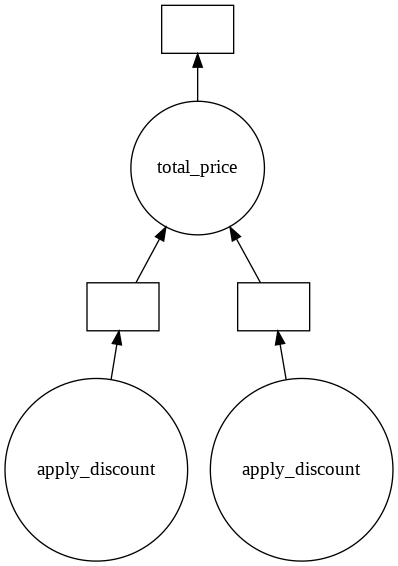

In [6]:
z.visualize()

In [7]:
# Functions to perform mathematics operations
def square(x):
    return x*x

def double(x):
    return x*2

def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = delayed(square)(i)
    b = delayed(double)(i)
    c = delayed(add)(a, b)
    output.append(c)

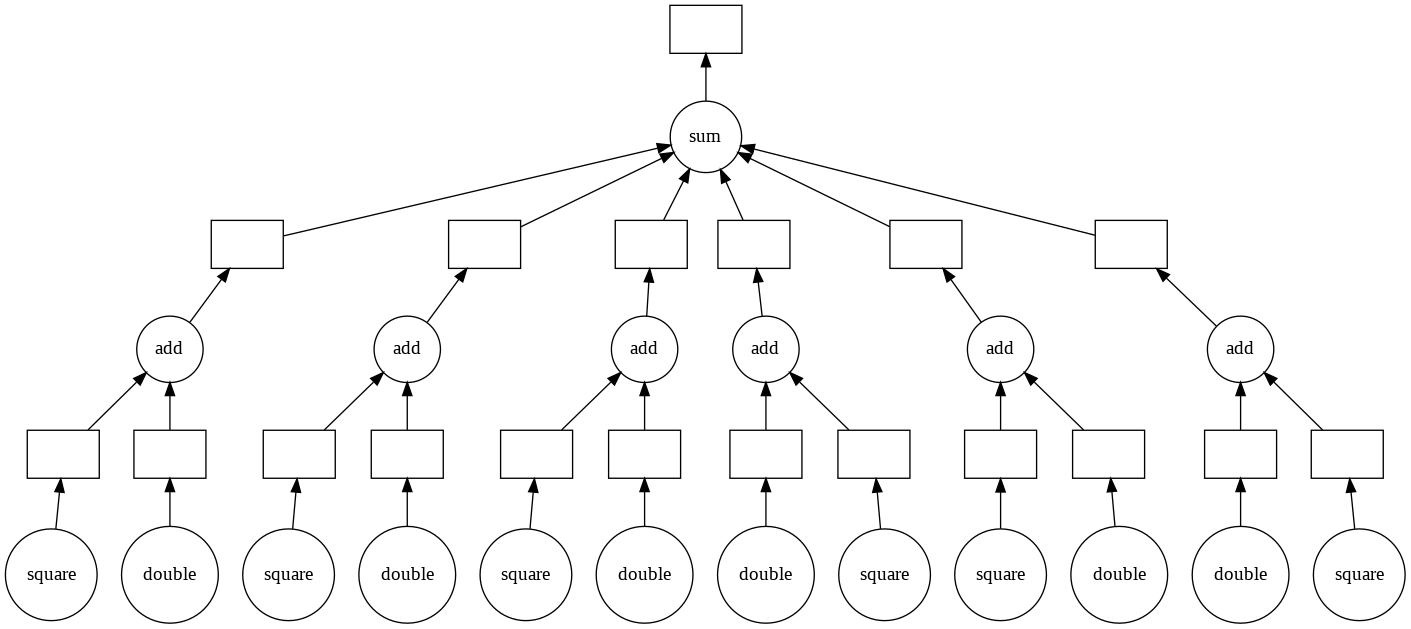

In [8]:
total = delayed(sum)(output)
total.visualize()

In [9]:
import concurrent

In [10]:
import multiprocessing
multiprocessing.cpu_count()

2

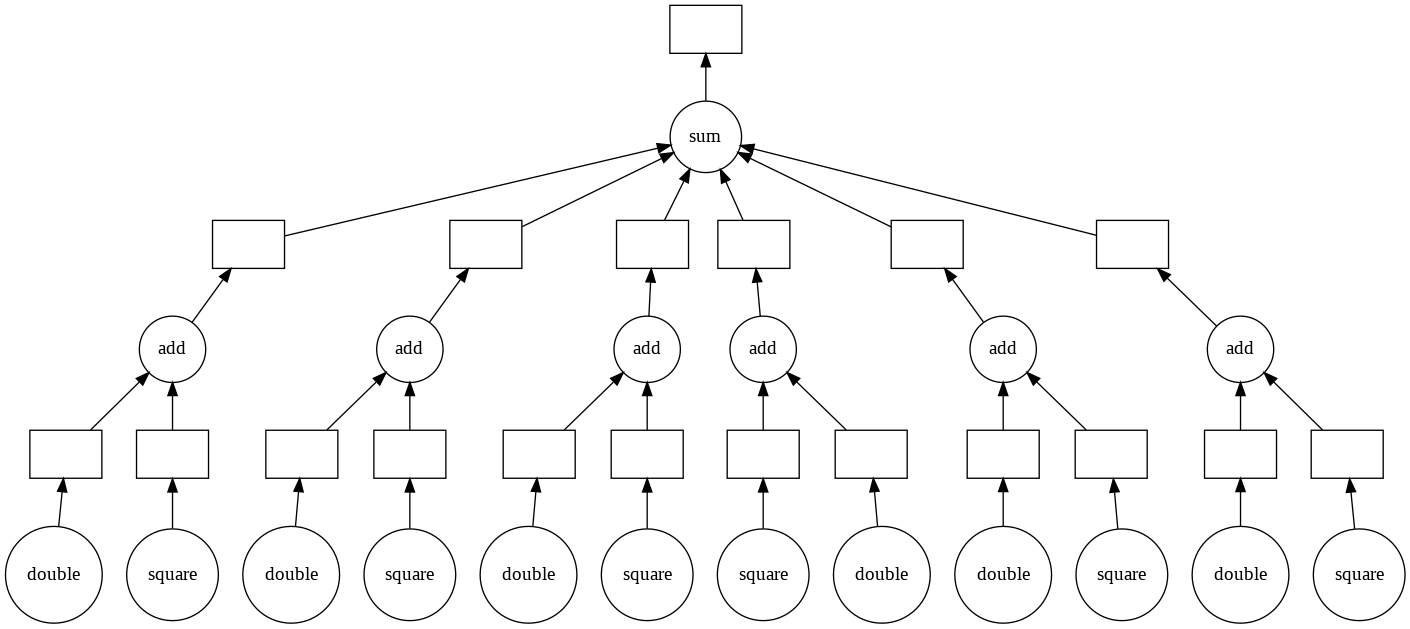

In [11]:
# Functions to perform mathematics operations
@delayed
def square(x):
    return x*x
@delayed
def double(x):
    return x*2
@delayed
def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = square(i)
    b = double(i)
    c = add(a, b)
    output.append(c)

total = delayed(sum)(output)
total.visualize()

In [12]:
!pip install dask[dataframe]

     |████████████████████████████████| 112kB 5.7MB/s 


In [13]:
import dask.dataframe as dd

In [14]:
dask.__version__

'2.12.0'

In [ ]:
from dask.distributed import Client

In [ ]:
client = Client(processes = False)

/usr/local/lib/python3.7/dist-packages/distributed/bokeh/core.py:57: UserWarning: 
Failed to start diagnostics server on port 8787. [Errno 99] Cannot assign requested address
  warnings.warn('\n' + msg)
/usr/local/lib/python3.7/dist-packages/distributed/deploy/local.py:197: UserWarning: 
Could not launch service 'bokeh' on port 8787. Got the following message:

[Errno 99] Cannot assign requested address
  self.scheduler.start(scheduler_address)
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 10.21 GB -- Worker memory limit: 13.65 GB


In [ ]:
client

Client Scheduler: inproc://172.28.0.2/57/1,Cluster Workers: 1 Cores: 2 Memory: 13.65 GB


distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 10.21 GB -- Worker memory limit: 13.65 GB


In [15]:
df = dask.datasets.timeseries()

In [16]:
df.head()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,974,Jerry,0.426125,-0.144283
2000-01-01 00:00:01,999,Zelda,-0.003882,0.665269
2000-01-01 00:00:02,1036,Ursula,-0.233117,-0.930012
2000-01-01 00:00:03,1017,Bob,0.240002,-0.448231
2000-01-01 00:00:04,959,Kevin,-0.003112,0.930400


In [17]:
df1 = df.groupby('name').y.std()

In [18]:
df1

Dask Series Structure:
npartitions=1
    float64
        ...
Name: y, dtype: float64
Dask Name: sqrt, 67 tasks

In [19]:
df1.compute()

name
Alice       0.578899
Bob         0.578094
Charlie     0.576724
Dan         0.577272
Edith       0.577858
Frank       0.575225
George      0.577341
Hannah      0.577211
Ingrid      0.577329
Jerry       0.576504
Kevin       0.576264
Laura       0.577252
Michael     0.578680
Norbert     0.576770
Oliver      0.576434
Patricia    0.577429
Quinn       0.578203
Ray         0.578283
Sarah       0.577019
Tim         0.577218
Ursula      0.577138
Victor      0.577604
Wendy       0.577115
Xavier      0.577814
Yvonne      0.577033
Zelda       0.577491
Name: y, dtype: float64

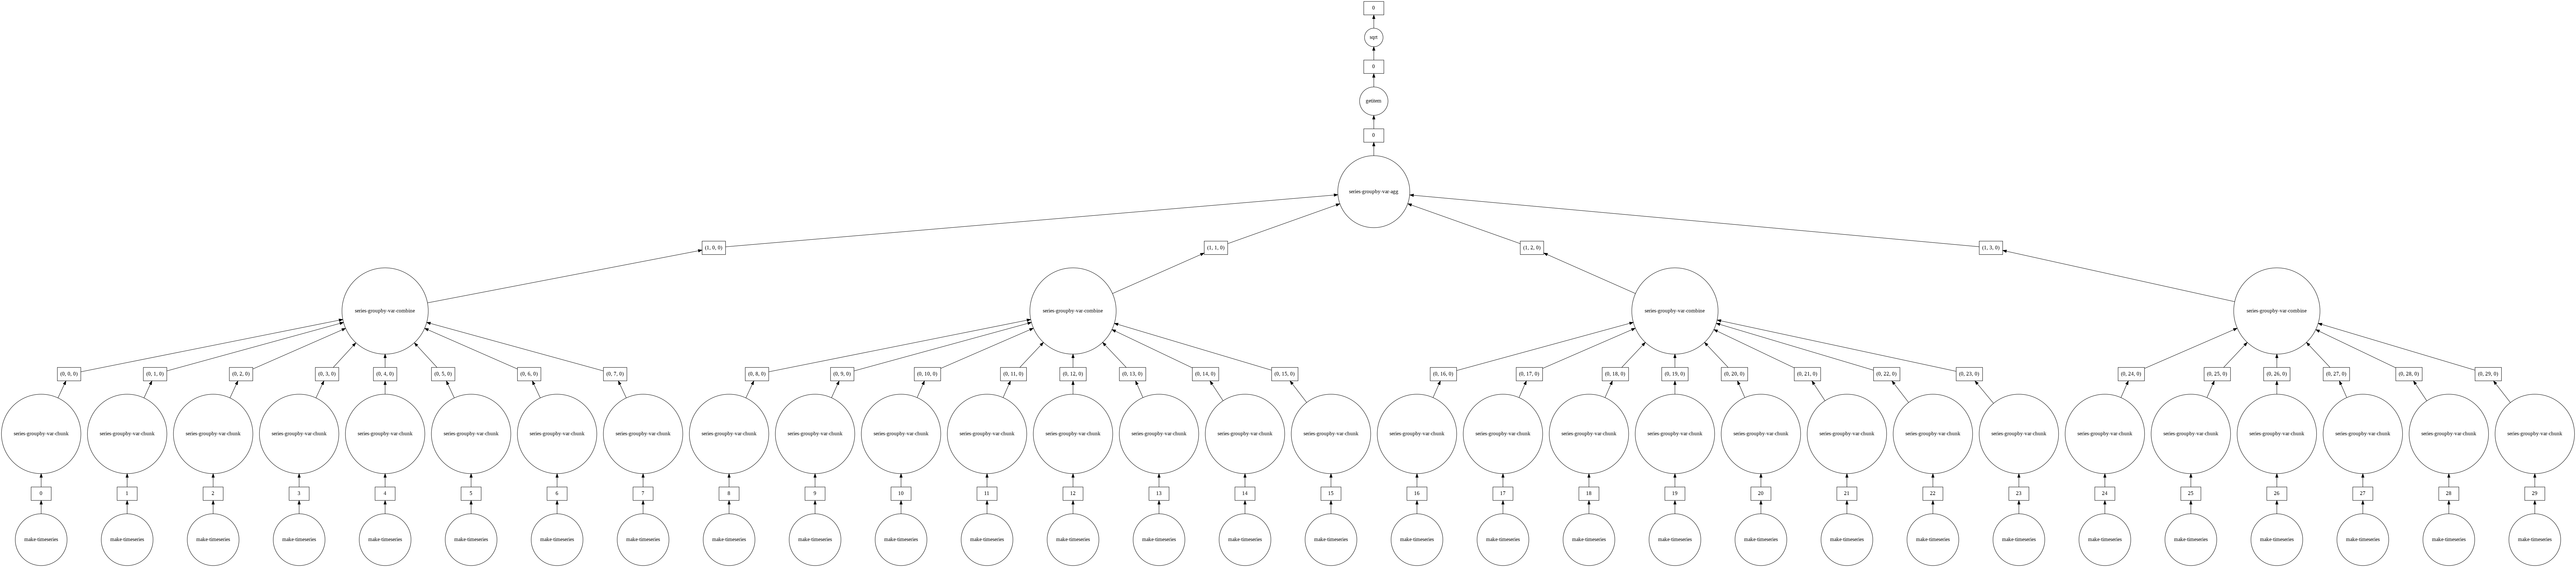

In [20]:
df1.visualize()

In [21]:
%time
df.loc['2000-01-01']

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


,id,name,x,y
npartitions=1,,,,
2000-01-01 00:00:00.000000000,int64,object,float64,float64
2000-01-01 23:59:59.999999999,...,...,...,...


In [22]:
df = df.persist()

In [23]:
%time
df.loc['2000-01-01'].compute()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,974,Jerry,0.426125,-0.144283
2000-01-01 00:00:01,999,Zelda,-0.003882,0.665269
2000-01-01 00:00:02,1036,Ursula,-0.233117,-0.930012
2000-01-01 00:00:03,1017,Bob,0.240002,-0.448231
2000-01-01 00:00:04,959,Kevin,-0.003112,0.930400
...,...,...,...,...
2000-01-01 23:59:55,965,Laura,0.753833,0.571965
2000-01-01 23:59:56,1005,Oliver,-0.905199,-0.314947
2000-01-01 23:59:57,1016,Patricia,0.553915,0.771934


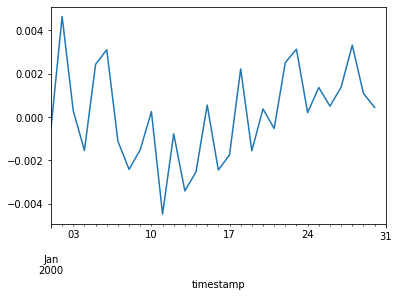

In [25]:
%matplotlib inline
df['y'].resample('24h').mean().compute().plot()

In [26]:
len(df)

2592000

In [27]:
from dask.distributed import Client
import pandas as pd
import time
import numpy as np

In [28]:
df = pd.DataFrame(np.random.random(size=(10000000, 4)),
                            columns=['param_a', 'param_b', 'param_c', 'param_d'])
df.head()

,param_a,param_b,param_c,param_d
0,0.546883,0.330606,0.582624,0.016028
1,0.608925,0.635707,0.307771,0.606830
2,0.456131,0.057465,0.923373,0.245456
3,0.088706,0.249947,0.161091,0.242157
4,0.065907,0.330305,0.995044,0.826326


In [29]:
def costly_simulation(list_param):
    time.sleep(3)
    return sum(list_param)

In [30]:
%%time
results = []
for col in df.columns:
    result = costly_simulation(df[col].values)
    results.append(result)

CPU times: user 7.45 s, sys: 38.8 ms, total: 7.49 s
Wall time: 19.4 s


In [31]:
results

[4998271.964567991, 5000170.745375903, 5001877.145055627, 4997933.129008678]

In [32]:
import dask

In [33]:
%%time
results = []
for col in df.columns:
    result =dask.delayed(costly_simulation)(df[col].values)
    results.append(result)

CPU times: user 1.68 ms, sys: 0 ns, total: 1.68 ms
Wall time: 1.43 ms


Here we see that dask runs so much faster. With dask, it computed in 1.68 ms and without dask it took 7.45 seconds.

In [34]:
results[0]

Delayed('costly_simulation-22214ab7-cdb4-45dc-9122-c493eefb9ac3')

In [35]:
%time dask.compute(*results)

CPU times: user 7.1 s, sys: 40 ms, total: 7.14 s
Wall time: 13.1 s


(4998271.964567991, 5000170.745375903, 5001877.145055627, 4997933.129008678)